Se carga el dataset que se utilizara

In [1]:
from pandas import DataFrame
import pandas as pd

dataset =  DataFrame(pd.read_csv('calificaciones.csv', header=None))
dataset = dataset.drop(dataset.columns[[0]], axis=1)
dataset = dataset.drop(0)
dataset.columns = range(dataset.shape[1])
print(dataset.head)

<bound method NDFrame.head of                       0                  1                  2  \
1     100,70,70,79,90,0   0,85,82,79,80,89  70,89,78,90,78,78   
2     100,70,70,79,90,0   0,85,82,79,80,89  70,89,78,90,78,89   
3        0,78,80,0,90,0  70,79,78,90,82,76  78,79,90,87,88,82   
4     80,90,79,82,81,70  70,72,79,90,84,74  78,72,80,70,80,90   
5       0,70,0,80,70,70   82,80,90,92,90,0  70,70,80,80,82,80   
..                  ...                ...                ...   
386   95,80,70,76,94,93  85,84,83,72,78,75   96,79,0,77,90,79   
387   70,93,72,99,78,74  89,89,88,96,70,96  73,96,93,83,95,90   
388    75,96,88,78,0,90   0,95,73,88,89,78  95,74,81,83,83,90   
389  100,98,82,82,88,98  72,70,85,94,75,92   99,0,74,85,98,91   
390    0,94,71,92,70,86  99,95,79,84,73,80  83,92,90,81,80,91   

                      3                    4  
1     72,85,90,95,95,80  100,100,96,92,90,90  
2     72,85,90,95,95,80  100,100,96,92,90,95  
3     90,96,92,90,89,70    97,86,82,81,70,76  
4

Procesamiento de datos (Se saca el promedio de cada semestre y se guarda en una sola variable)

In [2]:
#value = eval(dataset.loc[1, :][0])

aux = [0,0,0,0,0]
gradesAVGarray = []
        

for con in range(1, len(dataset) + 1):
    for con2 in range(0, 5):
        semestre = eval(dataset.loc[con, :][con2])
        grades = 0
        for con3 in range(0, len(semestre)):
            grades = grades + semestre[con3]
        #print(grades/len(semestre))
        aux[con2] = grades/len(semestre)
        grades = 0
    totalAvg = (aux[0] + aux[1] + aux[2] + aux[3] + aux[4])/5
    gradesAVGarray.append([aux[0], aux[1], aux[2], aux[3], aux[4], totalAvg])
    #print(aux)
print(gradesAVGarray)

[[68.16666666666667, 69.16666666666667, 80.5, 86.16666666666667, 94.66666666666667, 79.73333333333333], [68.16666666666667, 69.16666666666667, 82.33333333333333, 86.16666666666667, 95.5, 80.26666666666668], [41.333333333333336, 79.16666666666667, 84.0, 87.83333333333333, 82.0, 74.86666666666666], [80.33333333333333, 78.16666666666667, 78.33333333333333, 82.33333333333333, 80.0, 79.83333333333333], [48.333333333333336, 72.33333333333333, 77.0, 84.66666666666667, 81.5, 72.76666666666667], [81.66666666666667, 26.666666666666668, 81.0, 75.16666666666667, 91.16666666666667, 71.13333333333334], [81.83333333333333, 84.16666666666667, 86.5, 85.66666666666667, 52.5, 78.13333333333334], [85.33333333333333, 92.16666666666667, 80.16666666666667, 86.16666666666667, 81.66666666666667, 85.10000000000001], [88.0, 83.66666666666667, 47.0, 80.66666666666667, 40.0, 67.86666666666667], [79.33333333333333, 86.83333333333333, 96.83333333333333, 93.16666666666667, 87.66666666666667, 88.76666666666668], [60.0

Se transforma en una coleccion para el entrenamiento de la red y se normalizan los valores

In [3]:
from sklearn import preprocessing

datasetGradesAVG = pd.DataFrame(gradesAVGarray)
#print(datasetGradesAVG)

datasetnorm = preprocessing.minmax_scale(datasetGradesAVG, feature_range=(0, 1))
datasetnorm = DataFrame(datasetnorm)
print(datasetnorm)

            0         1         2         3         4         5
0    0.522310  0.628079  0.796258  0.838798  0.911111  0.759717
1    0.522310  0.628079  0.819127  0.838798  0.925000  0.773852
2    0.099738  0.775862  0.839917  0.866120  0.700000  0.630742
3    0.713911  0.761084  0.769231  0.775956  0.666667  0.762367
4    0.209974  0.674877  0.752599  0.814208  0.691667  0.575088
..        ...       ...       ...       ...       ...       ...
385  0.782152  0.780788  0.667360  0.592896  0.730556  0.710247
386  0.724409  0.906404  0.893971  0.942623  0.772222  0.958481
387  0.569554  0.647783  0.844075  0.147541  0.777778  0.537102
388  0.887139  0.807882  0.721414  0.838798  0.502778  0.785336
389  0.532808  0.862069  0.866944  0.765027  0.475000  0.714664

[390 rows x 6 columns]


Preparamos los datos para alimentar la red para entrenamiento y prueba.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

zy = datasetnorm.iloc[:, -1:]
zx = datasetnorm.iloc[:, :-1].values
X = np.array(zx, dtype='float64')
y = np.array(zy, dtype='float64')

print(zy)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)

#print(X_train.shape, y_train.shape) 

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape((y_train.shape[0], 1, y_train.shape[1]))
y_test = y_test.reshape((y_test.shape[0], 1, y_test.shape[1]))

#print(X_train.shape, y_train.shape)

            5
0    0.759717
1    0.773852
2    0.630742
3    0.762367
4    0.575088
..        ...
385  0.710247
386  0.958481
387  0.537102
388  0.785336
389  0.714664

[390 rows x 1 columns]


Contruimos nuestro modelo y compilamos

In [5]:
from keras.models import Sequential
from keras.layers import Dense

#model = Sequential() 
#model.add(Dense(8, activation = 'relu', input_shape=(X_train.shape[1], X_train.shape[2]))) # importante declarar correctamente shape
#model.add(Dense(20, activation='relu'))

model = Sequential() 
model.add(Dense(10, activation = 'relu', input_shape=(X_train.shape[1], X_train.shape[2]))) # importante declarar correctamente shape
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam', metrics=['mse'])

Using TensorFlow backend.
/home/jpburgenos/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jpburgenos/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jpburgenos/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jpburgenos/.local/lib/python3.6/site-packages/t

Entrenamos nuestro modelo y guardamos datos en "history"

In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=24, validation_data=(X_test, y_test), verbose=1, shuffle=False)

model.save('hackathon.h5')


Train on 273 samples, validate on 117 samples
Epoch 1/50
273/273 [==============================] - 1s 2ms/step - loss: 0.3559 - mse: 0.3559 - val_loss: 0.1658 - val_mse: 0.1658
Epoch 2/50
273/273 [==============================] - 0s 196us/step - loss: 0.1032 - mse: 0.1032 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 3/50
273/273 [==============================] - 0s 191us/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 4/50
273/273 [==============================] - 0s 154us/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 5/50
273/273 [==============================] - 0s 173us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 6/50
273/273 [==============================] - 0s 179us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 7/50
273/273 [==============================] - 0s 254us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 8/50
273/27

Graficamos...

In [7]:
from matplotlib import pyplot

pyplot.style.use("ggplot")
pyplot.plot(history.history['mse'], label='mse')
pyplot.plot(history.history['val_mse'], label='val_mse')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

<Figure size 640x480 with 1 Axes>

Se realiza una predicción con los datos de prueba, y estos son comparados.

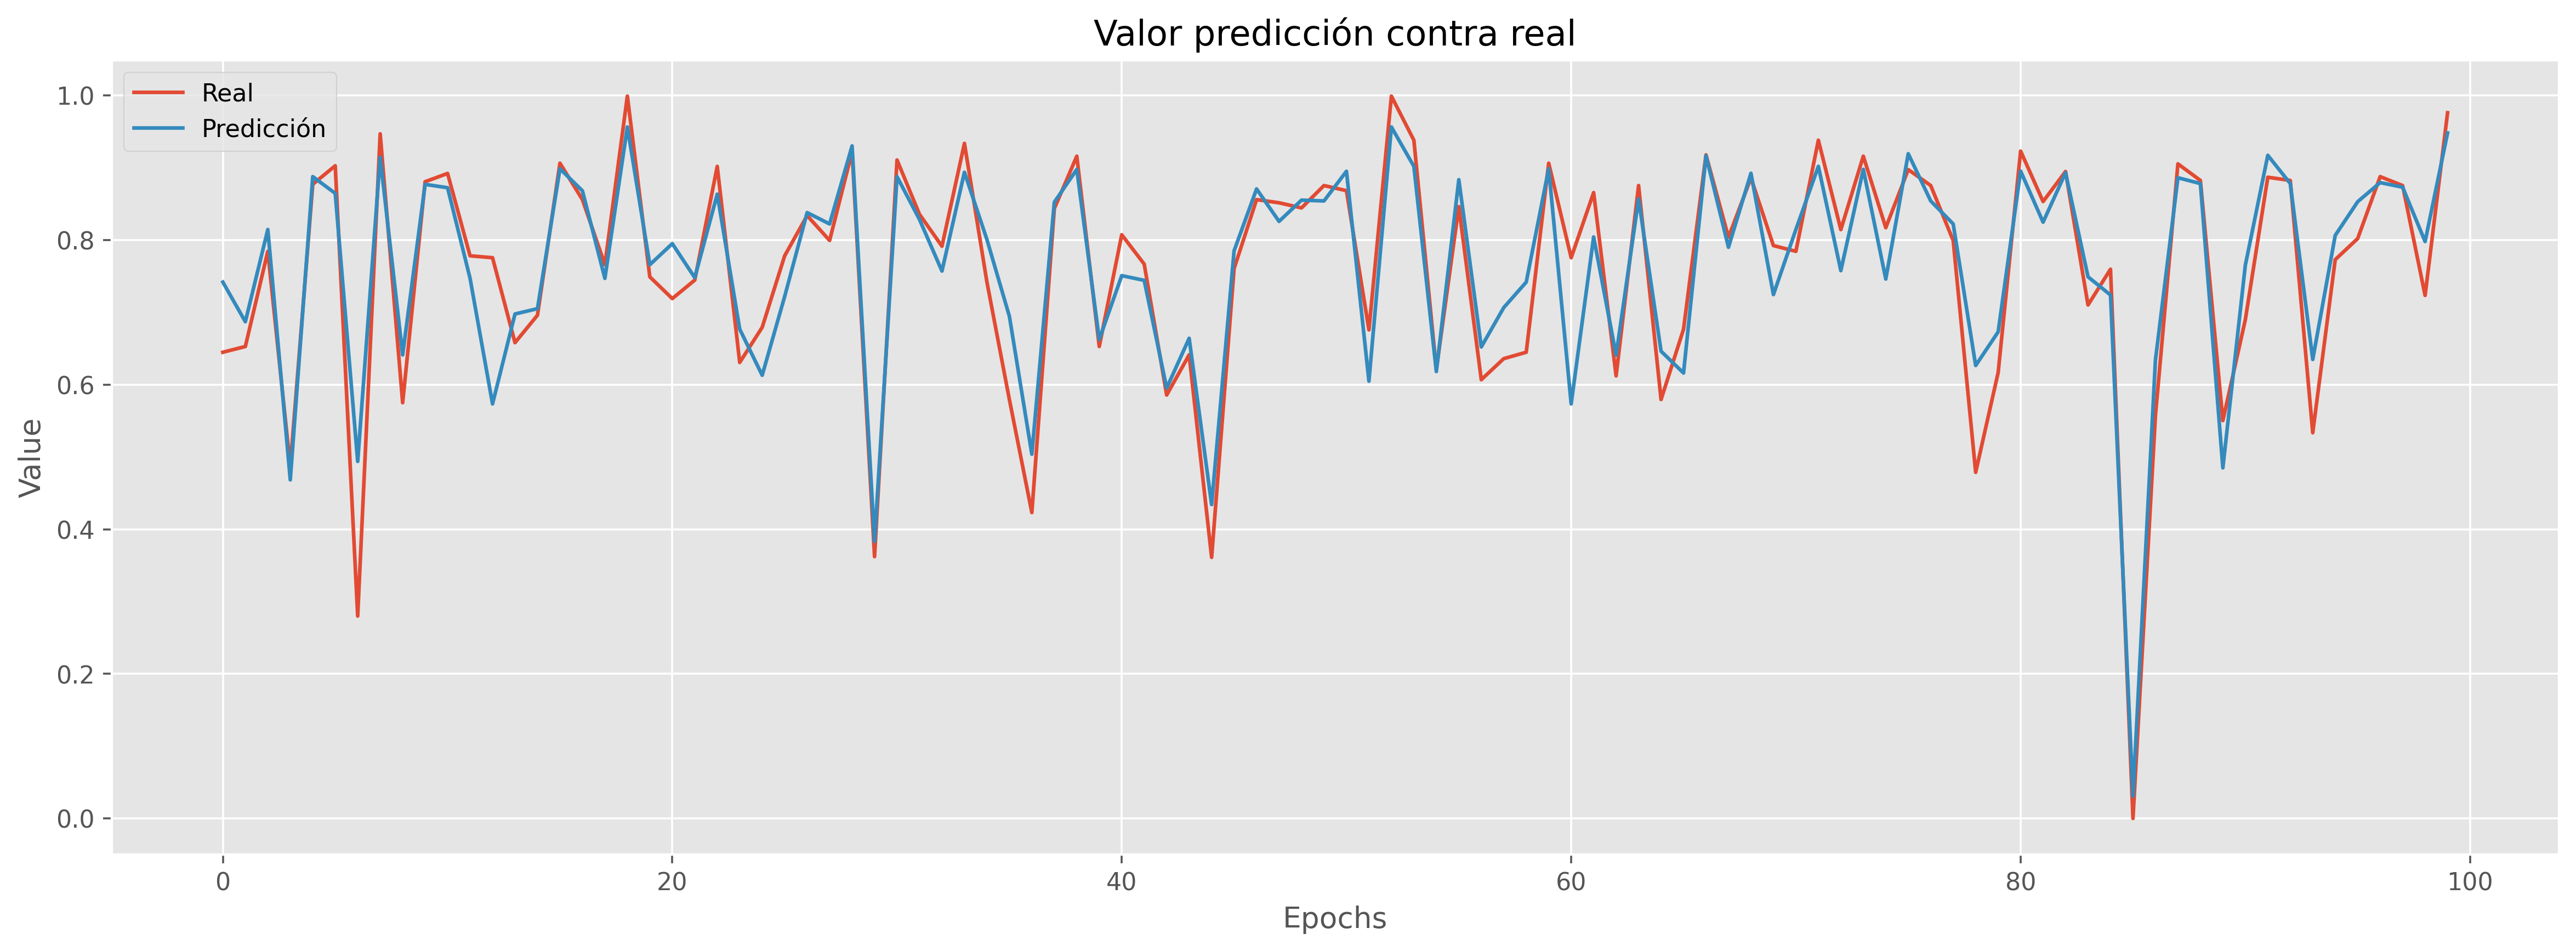

[[[0.39370079 0.85714286 0.58419958 0.80327869 0.74722222]]

 [[0.74278215 0.47783251 0.8024948  0.82786885 0.51388889]]

 [[0.67454068 0.87438424 0.64449064 0.87431694 0.71666667]]

 [[0.39370079 0.74137931 0.75467775 0.19125683 0.775     ]]

 [[0.78740157 0.84236453 0.78378378 0.80054645 0.81388889]]

 [[0.84514436 0.90394089 0.83991684 0.79234973 0.69722222]]

 [[0.07611549 0.46305419 0.20790021 0.82786885 0.85833333]]

 [[0.82939633 0.92857143 0.83575884 0.85519126 0.76666667]]

 [[0.20997375 0.67487685 0.75259875 0.81420765 0.69166667]]

 [[0.69816273 0.94581281 0.81912682 0.73770492 0.81944444]]

 [[0.85301837 0.83743842 0.8981289  0.73497268 0.71111111]]

 [[0.77952756 0.91625616 0.85862786 0.56284153 0.56944444]]

 [[1.         1.         0.91476091 0.71857923 0.        ]]

 [[0.55905512 0.63546798 0.94594595 0.75136612 0.43333333]]

 [[0.58530184 0.91625616 0.8004158  0.89071038 0.26111111]]

 [[0.81364829 0.79310345 0.84407484 0.94262295 0.70833333]]

 [[0.76377953 0.79310345

In [8]:
predictions = model.predict(X_test, 10, verbose=2)
predicted = predictions.transpose(2,0,1).reshape(-1,predictions.shape[1])
y_test = y_test.transpose(2,0,1).reshape(-1,y_test.shape[1])

pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.plot(y_test[0:100,], label='Real')
pyplot.plot(predicted[0:100,], label='Predicción')
pyplot.title('Valor predicción contra real')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

print(X_test)

In [9]:
print(X_test[100])
print(y_test[100])

[[0.8976378  0.95566502 0.85654886 0.8442623  0.78333333]]
[0.99028269]
